In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('ggplot')
df=pd.read_csv(r"/KaggleV2-May-2016.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10785 entries, 0 to 10784
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PatientId       10785 non-null  float64
 1   AppointmentID   10785 non-null  int64  
 2   Gender          10785 non-null  object 
 3   ScheduledDay    10785 non-null  object 
 4   AppointmentDay  10785 non-null  object 
 5   Age             10785 non-null  int64  
 6   Neighbourhood   10785 non-null  object 
 7   Scholarship     10784 non-null  float64
 8   Hipertension    10784 non-null  float64
 9   Diabetes        10784 non-null  float64
 10  Alcoholism      10784 non-null  float64
 11  Handcap         10784 non-null  float64
 12  SMS_received    10784 non-null  float64
 13  No-show         10784 non-null  object 
dtypes: float64(7), int64(2), object(5)
memory usage: 1.2+ MB


In [ ]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0.0,1.0,0.0,0.0,0.0,0.0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0.0,0.0,0.0,0.0,0.0,0.0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0.0,0.0,0.0,0.0,0.0,0.0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0.0,0.0,0.0,0.0,0.0,0.0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0.0,1.0,1.0,0.0,0.0,0.0,No


In [ ]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [ ]:
df.shape

(10785, 14)

Exploring the dataset

In [ ]:
#cheching for null values present in the dataset
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       1
Hipertension      1
Diabetes          1
Alcoholism        1
Handcap           1
SMS_received      1
No-show           1
dtype: int64

In [ ]:
#checking fro the duplicate values in the dataset
df.duplicated().sum()

0

In [ ]:
#for knowing the statistical description of the data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.078500e+04,1.078500e+04,10785.000000,10784.000000,10784.000000,10784.000000,10784.000000,10784.000000,10784.000000
mean,1.564572e+14,5.647538e+06,37.854149,0.085126,0.195660,0.064262,0.059440,0.021142,0.322329
std,2.675289e+14,6.644964e+04,22.030057,0.279082,0.396726,0.245230,0.236457,0.155035,0.467390
min,9.377953e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.459497e+12,5.623695e+06,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.215621e+13,5.651462e+06,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.532898e+13,5.694639e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999350e+14,5.754683e+06,98.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000


Data Cleaning

In [ ]:
#deleting the columns which are not needed for analysis
#droping the patient Id and appointment ID


df.drop(['PatientId','AppointmentID'], axis=1, inplace = True)
df


,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0.0,1.0,0.0,0.0,0.0,0.0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0.0,0.0,0.0,0.0,0.0,0.0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0.0,0.0,0.0,0.0,0.0,0.0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0.0,0.0,0.0,0.0,0.0,0.0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0.0,1.0,1.0,0.0,0.0,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...
10780,M,2016-04-25T07:44:31Z,2016-05-16T00:00:00Z,17,JOANA D´ARC,0.0,0.0,0.0,0.0,0.0,0.0,Yes
10781,M,2016-05-05T15:18:00Z,2016-05-05T00:00:00Z,40,BELA VISTA,0.0,0.0,0.0,1.0,0.0,0.0,No
10782,F,2016-05-05T15:39:52Z,2016-05-05T00:00:00Z,5,BELA VISTA,1.0,0.0,0.0,0.0,0.0,0.0,No
10783,F,2016-05-12T15:30:42Z,2016-05-12T00:00:00Z,71,SANTO ANTÔNIO,0.0,1.0,0.0,0.0,0.0,0.0,No


In [ ]:
#putting underscores in the some column names to make them readable
new_col={'ScheduledDay':'Scheduled_Day','AppointmentDay':'Appointment_Day','Hipertension':'hypertension','Handcap':'Handicap','No-show':'Show'}
df.rename(columns=new_col,inplace=True)

In [ ]:
df.head()

,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0.0,1.0,0.0,0.0,0.0,0.0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0.0,0.0,0.0,0.0,0.0,0.0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0.0,0.0,0.0,0.0,0.0,0.0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0.0,0.0,0.0,0.0,0.0,0.0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0.0,1.0,1.0,0.0,0.0,0.0,No


In [ ]:
df['Show']=df['Show'].apply(lambda x: 1 if x=='No' else 0)
df.tail()

,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Show
10780,M,2016-04-25T07:44:31Z,2016-05-16T00:00:00Z,17,JOANA D´ARC,0.0,0.0,0.0,0.0,0.0,0.0,0
10781,M,2016-05-05T15:18:00Z,2016-05-05T00:00:00Z,40,BELA VISTA,0.0,0.0,0.0,1.0,0.0,0.0,1
10782,F,2016-05-05T15:39:52Z,2016-05-05T00:00:00Z,5,BELA VISTA,1.0,0.0,0.0,0.0,0.0,0.0,1
10783,F,2016-05-12T15:30:42Z,2016-05-12T00:00:00Z,71,SANTO ANTÔNIO,0.0,1.0,0.0,0.0,0.0,0.0,1
10784,M,2016-05-16T07:08:55Z,2016-05-30T00:00:00Z,17,JOAN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10785 entries, 0 to 10784
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           10785 non-null  object 
 1   Scheduled_Day    10785 non-null  object 
 2   Appointment_Day  10785 non-null  object 
 3   Age              10785 non-null  int64  
 4   Neighbourhood    10785 non-null  object 
 5   Scholarship      10784 non-null  float64
 6   hypertension     10784 non-null  float64
 7   Diabetes         10784 non-null  float64
 8   Alcoholism       10784 non-null  float64
 9   Handicap         10784 non-null  float64
 10  SMS_received     10784 non-null  float64
 11  Show             10785 non-null  int64  
dtypes: float64(6), int64(2), object(4)
memory usage: 1011.2+ KB


In [ ]:
#changing the Sheduled_Day,Appointment_Day to datetime data type
df['Scheduled_Day']=pd.to_datetime(df['Scheduled_Day'])
df['Appointment_Day']=pd.to_datetime(df['Appointment_Day'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10785 entries, 0 to 10784
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   Gender           10785 non-null  object             
 1   Scheduled_Day    10785 non-null  datetime64[ns, UTC]
 2   Appointment_Day  10785 non-null  datetime64[ns, UTC]
 3   Age              10785 non-null  int64              
 4   Neighbourhood    10785 non-null  object             
 5   Scholarship      10784 non-null  float64            
 6   hypertension     10784 non-null  float64            
 7   Diabetes         10784 non-null  float64            
 8   Alcoholism       10784 non-null  float64            
 9   Handicap         10784 non-null  float64            
 10  SMS_received     10784 non-null  float64            
 11  Show             10785 non-null  int64              
dtypes: datetime64[ns, UTC](2), float64(6), int64(2), object(2)
memory usage: 1

In [ ]:
#finding the negative values in age we can say them as noise which are of no use
df_Age = df.query('Age < 0')
df_Age

,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Show


In [ ]:
#droping the negative age values
df.drop(df_Age.index, inplace=True)

In [ ]:
#checking for the negative age values
df_Age = df.query('Age < 0')
df_Age
#there are no negative values for age column

,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Show


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10785 entries, 0 to 10784
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   Gender           10785 non-null  object             
 1   Scheduled_Day    10785 non-null  datetime64[ns, UTC]
 2   Appointment_Day  10785 non-null  datetime64[ns, UTC]
 3   Age              10785 non-null  int64              
 4   Neighbourhood    10785 non-null  object             
 5   Scholarship      10784 non-null  float64            
 6   hypertension     10784 non-null  float64            
 7   Diabetes         10784 non-null  float64            
 8   Alcoholism       10784 non-null  float64            
 9   Handicap         10784 non-null  float64            
 10  SMS_received     10784 non-null  float64            
 11  Show             10785 non-null  int64              
dtypes: datetime64[ns, UTC](2), float64(6), int64(2), object(2)
memory usage: 1

Data Analysis (Descriptive analysis)


Gender Distribution-by observing the pie chart I can conclude that the female visits are more frequent.

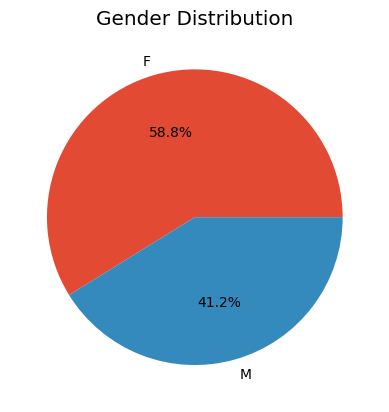

In [ ]:

# pie chart of gender distribution
gender_counts = df['Gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()


By ploting the histogram I can conclude that the Age distribution and description according to the stats.

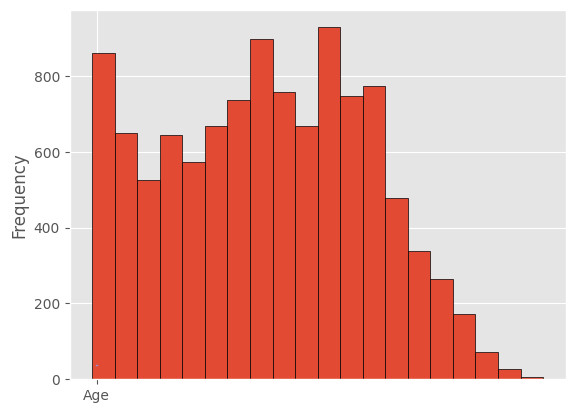

count    10785.000000
mean        37.854149
std         22.030057
min          0.000000
25%         20.000000
50%         38.000000
75%         55.000000
max         98.000000
Name: Age, dtype: float64


In [ ]:
age_stats = df['Age'].describe()

# Ploting  a histogram of age
df['Age'].plot(kind='hist', bins=20, edgecolor='black')

# Creating  a box plot of age
df.boxplot(column='Age')

plt.show()
print(age_stats)

From the below Scatter plot I can conclude that there Age and hypertension are corelated and common in certain age groups.

<ipython-input-32-2f023729e824>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


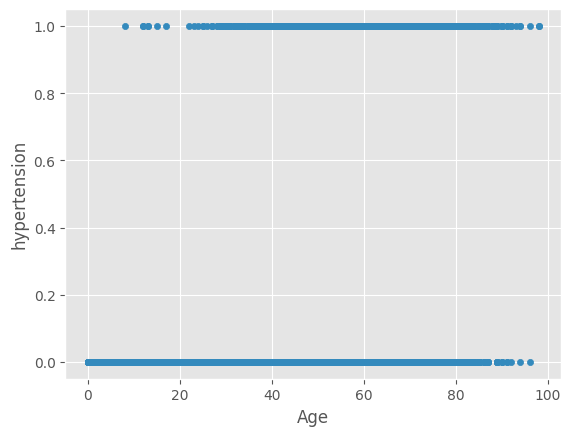

Show       0     1
Gender            
F       1343  5001
M        854  3587
                   Age  Scholarship  hypertension  Diabetes  Alcoholism  \
Age           1.000000    -0.045747      0.472541  0.278685    0.140879   
Scholarship  -0.045747     1.000000      0.018749 -0.032511    0.030122   
hypertension  0.472541     0.018749      1.000000  0.416948    0.103389   
Diabetes      0.278685    -0.032511      0.416948  1.000000   -0.016300   
Alcoholism    0.140879     0.030122      0.103389 -0.016300    1.000000   
Handicap      0.051721    -0.007306      0.053360  0.054513    0.008722   
SMS_received -0.015975     0.017135      0.003944 -0.005157   -0.089462   
Show          0.068614    -0.030582      0.021285  0.007624    0.019020   

              Handicap  SMS_received      Show  
Age           0.051721     -0.015975  0.068614  
Scholarship  -0.007306      0.017135 -0.030582  
hypertension  0.053360      0.003944  0.021285  
Diabetes      0.054513     -0.005157  0.007624  
Alc

In [ ]:
# Cross-tabulation of Gender and No-show
gender_show = pd.crosstab(df['Gender'], df['Show'])

# Correlation matrix
correlation_matrix = df.corr()

# Scatter plot of Age and Hipertension
df.plot(kind='scatter', x='Age', y='hypertension')

plt.show()

print(gender_show)
print(correlation_matrix)


From the below Scatter plot I can say that The relation between Sheduled_Day and Appointment_Day from the plot the cluster represents that mnost of the patients visited as per the sheduled appointment.

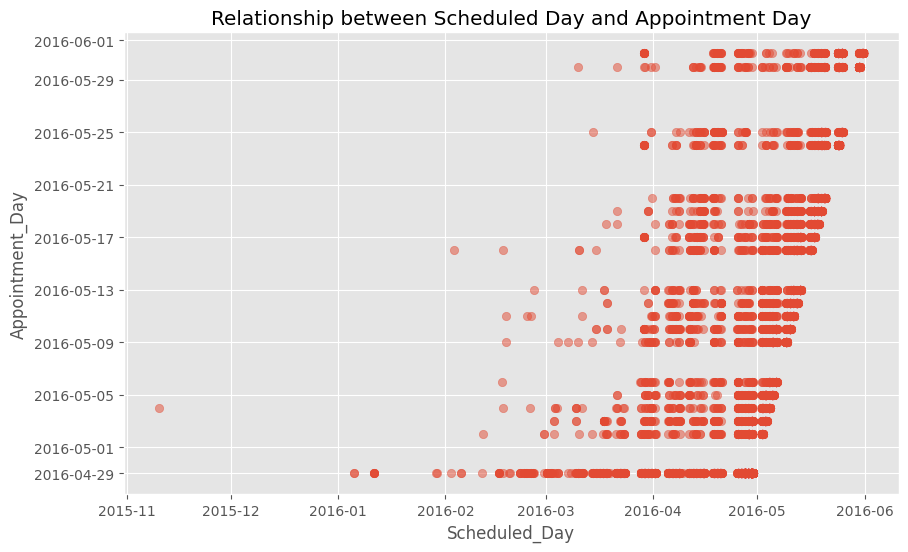

In [ ]:


# Converting date columns to datetime format
df['Appointment_Day'] = pd.to_datetime(df['Appointment_Day'])
df['Scheduled_Day'] = pd.to_datetime(df['Scheduled_Day'])

# Createing a scatter plot of AppointmentDay and ScheduledDay
plt.figure(figsize=(10, 6))
plt.scatter(df['Scheduled_Day'], df['Appointment_Day'], alpha=0.5)

# Seting labels and title
plt.xlabel('Scheduled_Day')
plt.ylabel('Appointment_Day')
plt.title('Relationship between Scheduled Day and Appointment Day')

# Displaying the plot
plt.show()


From the below  Histogram we can visualize the Appointment distribution by date and It will be helpful the client understanding. The other dates are evenly distributed except 29-4-2016 this day had more appointments.

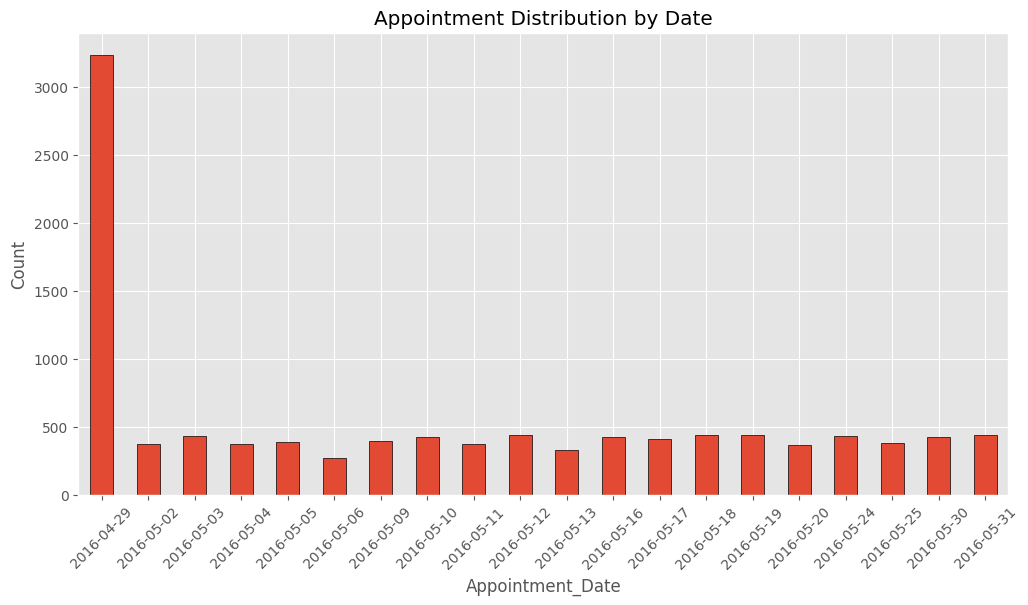

In [ ]:

# Convering the "AppointmentDay" column to datetime format
df['Appointment_Day'] = pd.to_datetime(df['Appointment_Day'])

# Extracting the appointment dates and counting the occurrences
appointment_counts = df['Appointment_Day'].dt.date.value_counts().sort_index()
# Creating a bar plot of the appointment counts by date
plt.figure(figsize=(12, 6))
appointment_counts.plot(kind='bar', edgecolor='black')
# Seting labels and title
plt.xlabel('Appointment_Date')
plt.ylabel('Count')
plt.title('Appointment Distribution by Date')
plt.xticks(rotation=45)
plt.show()


From the line chart we can conclude that the most of the appointments are sheduled in the 5th month of 2016.

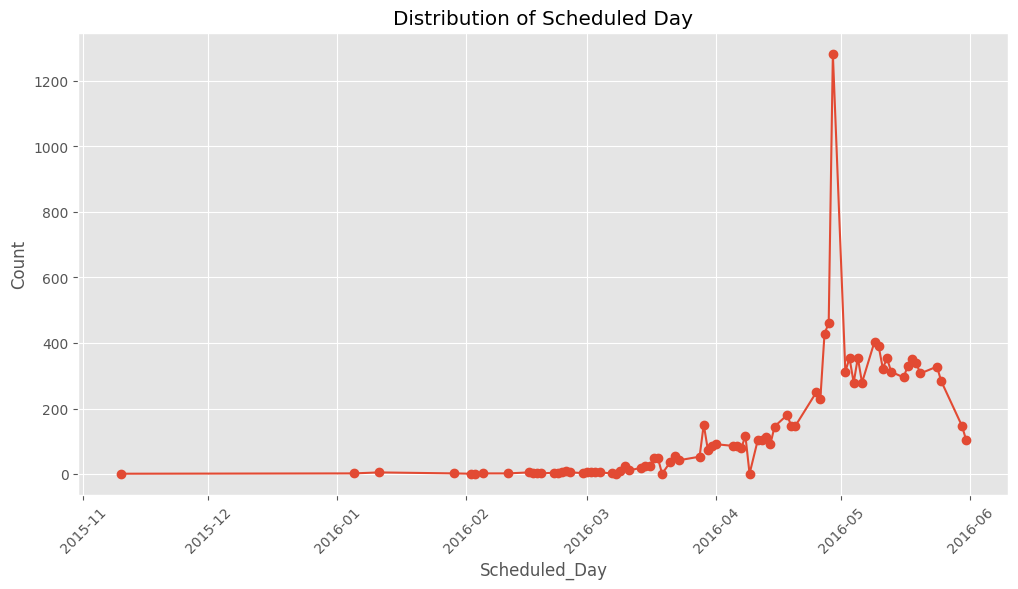

In [ ]:
# Converting "ScheduledDay" to datetime
df['Scheduled_Day'] = pd.to_datetime(df['Scheduled_Day'])
# applying Group by date and count occurrences
scheduled_counts = df['Scheduled_Day'].dt.date.value_counts().sort_index()
# Creating a line plot of the count of occurrences over time
plt.figure(figsize=(12, 6))
scheduled_counts.plot(kind='line', marker='o')
# Setting labels and title
plt.xlabel('Scheduled_Day')
plt.ylabel('Count')
plt.title('Distribution of Scheduled Day')
plt.xticks(rotation=45)
plt.show()


The below Hisograms help in understanding the Data more accurately and their distributions.

array([[<Axes: title={'center': 'Scheduled_Day'}>,
        <Axes: title={'center': 'Appointment_Day'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Scholarship'}>,
        <Axes: title={'center': 'hypertension'}>,
        <Axes: title={'center': 'Diabetes'}>],
       [<Axes: title={'center': 'Alcoholism'}>,
        <Axes: title={'center': 'Handicap'}>,
        <Axes: title={'center': 'SMS_received'}>],
       [<Axes: title={'center': 'Show'}>, <Axes: >, <Axes: >]],
      dtype=object)

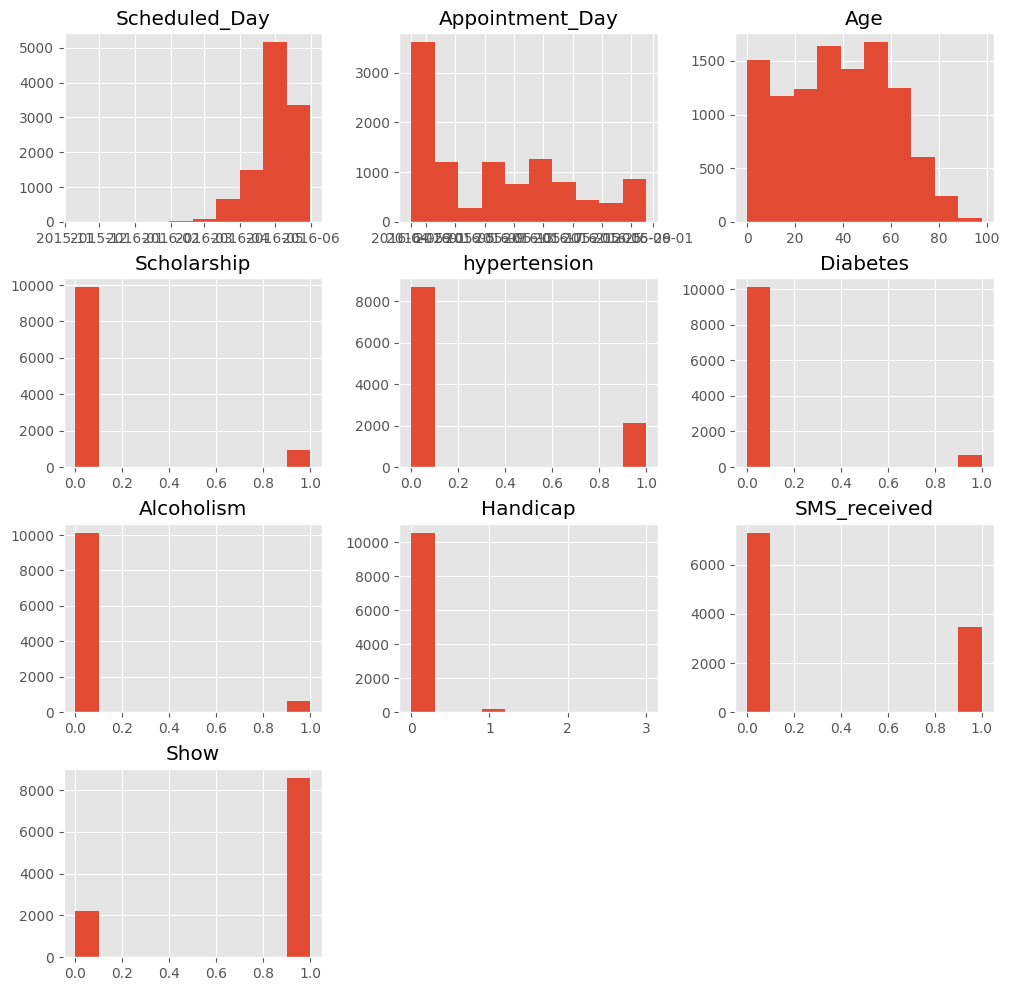

In [ ]:
#using histogram to analyse the columns
df.hist(figsize=(12,12))